In [149]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split, cross_val_score
from scipy.stats import randint
import xgboost as xgb
from xgboost import XGBClassifier

#Import the data
df = pd.read_csv("../data/processed/diabetes_binary_health_indicators_BRFSS2015.csv")
# Features & target for classification
feature_cols_clf = [
    'HighBP','HighChol','BMI','Smoker','HeartDiseaseorAttack','PhysActivity','Fruits'
]
X= df[feature_cols_clf]
y = df['Diabetes_binary']
X[feature_cols_clf].astype('category')
#split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)


Find the best hyperpamaters for a random Forest

In [133]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(RandomForestClassifier(), param_grid)
random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best Estimator:", random_search.best_estimator_)


KeyboardInterrupt: 

Train the forest


In [134]:
#Train the Model
rf = RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,n_estimators=200, bootstrap=True)
rf.fit(X_train, y_train)




RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200)

Test the Random Forest

Accuracy: 0.865200252286345
Precision: 0.6018387553041018
Recall: 0.09629964920221795
AUC: 0.5429925411978516
0.86 accuracy with a standard deviation of 0.00
0.86 accuracy with a standard deviation of 0.00


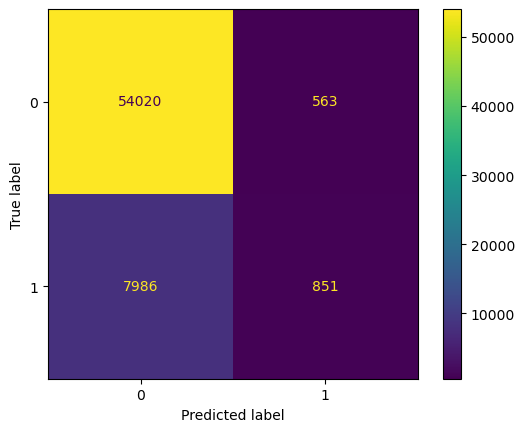

In [158]:
#Test the model
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
AUC = roc_auc_score(y_test,y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("AUC:",AUC)
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()
scores = (cross_val_score(rf, X, y))
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))



<Axes: >

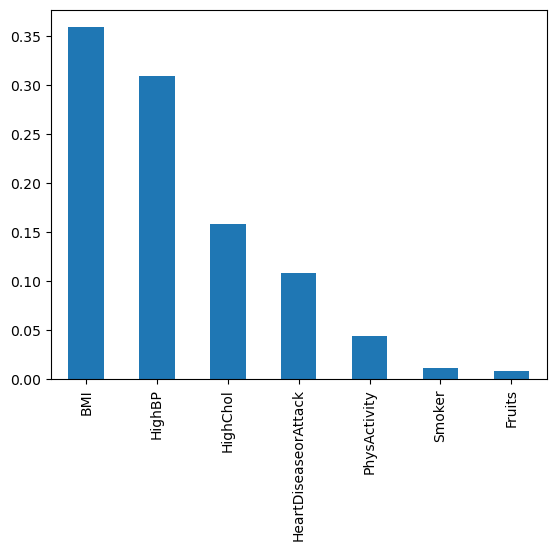

In [159]:
# Create a series containing feature importances from the model and feature names from the training data
importances = pd.Series(rf.feature_importances_, index=X_train.columns)
importances.sort_values(ascending=False).plot.bar()

Create DMatricx and train the model

In [154]:
# Train XGBoost using the sklearn API (XGBClassifier)
# This returns label predictions via `predict` and probabilities via `predict_proba`.
model = XGBClassifier(objective='binary:logistic', use_label_encoder=False, eval_metric='logloss', tree_method='exact')
model.fit(X_train, y_train)

# prepare predictions: probabilities for AUC, discrete labels for accuracy/precision/recall
y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

/opt/anaconda3/lib/python3.13/site-packages/xgboost/core.py:158: UserWarning: [16:25:33] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.8630085146641439
Precision: 0.5545787545787546
Recall: 0.08566255516578024
AUC: 0.7837187057693429


KeyboardInterrupt: 

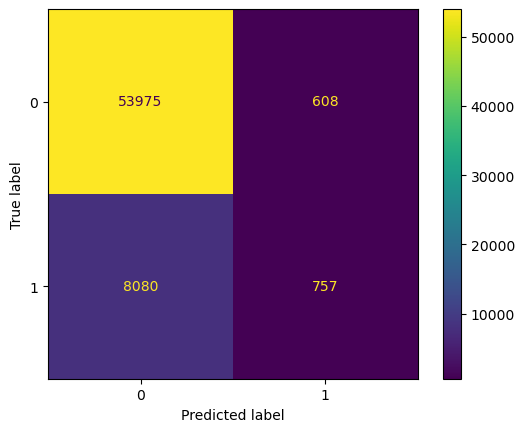

In [ ]:
# Evaluate XGBoost model (sklearn wrapper)
import numpy as np

# `y_pred` (labels) and `y_pred_proba` (positive-class probabilities) were created in the previous cell
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
AUC = roc_auc_score(y_test, y_pred_proba)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("AUC:", AUC)
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()
scores = (cross_val_score(rf, X, y))
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
# Create a series containing feature importances from the model and feature names from the training data
importances = pd.Series(model.feature_importances_, index=X_train.columns)
importances.sort_values(ascending=False).plot.bar()


<Axes: >

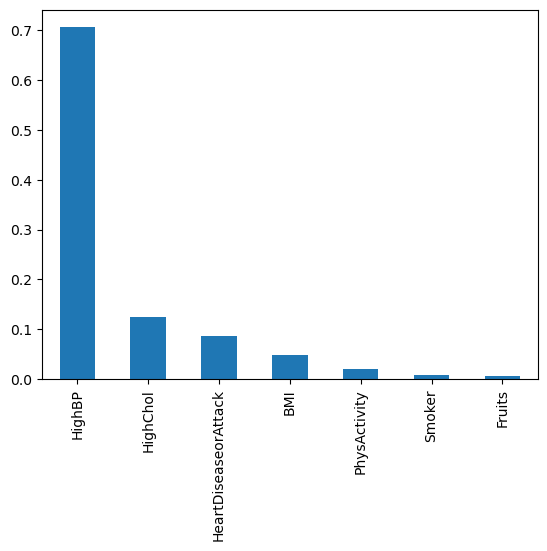

In [160]:
# Create a series containing feature importances from the model and feature names from the training data
importances = pd.Series(model.feature_importances_, index=X_train.columns)
importances.sort_values(ascending=False).plot.bar()